# 1. Classifier algorithms

### Import libraries

In [202]:
import pandas as pd
import sys  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.decomposition import PCA

### Load data

In [203]:
!{sys.executable} -m pip install --user matplotlib
dataFrame = pd.read_csv('./data/spam.dat')

### Data size

In [204]:
dataFrame.shape

(4789, 463)

In [205]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB


### Data describe

In [55]:
dataFrame.describe()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
count,4789.000000,4789.0,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,0.008144,0.0,0.006056,0.000209,0.006682,0.000626,0.005638,0.007308,0.001879,0.002088,...,0.315097,0.001044,0.000626,0.012946,0.009397,0.000418,0.019420,0.000835,0.001253,0.000626
std,0.089883,0.0,0.077590,0.014450,0.081478,0.025023,0.074882,0.085185,0.043315,0.045653,...,0.464603,0.032298,0.025023,0.113055,0.096489,0.020434,0.138009,0.028892,0.035377,0.025023
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Is data balanced?

In [206]:
dataFrame['target'].value_counts()

no     2949
yes    1840
Name: target, dtype: int64

### Split data into train and test

In [207]:
X = dataFrame.drop(['target'], axis=1)
y = dataFrame.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=331, test_size=0.33)
print(f'Train rows={X_train.shape[0]}, test rows: {X_test.shape[0]}')

Train rows=3208, test rows: 1581


### Standarization

In [58]:
scaler = StandardScaler()
X_train_standarized = scaler.fit_transform(X_train)
X_test_standarized = scaler.fit_transform(X_test)

### SVM

In [59]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_standarized, y_train)
y_prediction_svm = svm.predict(X_test_standarized)
svm_score = svm.score(X_test_standarized, y_test)
print(f'Score={svm_score}')

Score=0.9753320683111955


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


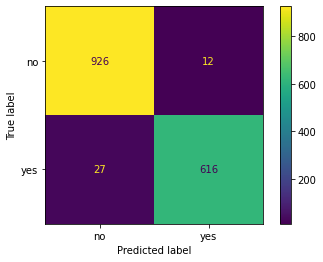

tp=616, fn=27, fp=12, tn=926
sensitivity=0.9580, specificity=0.9872
FPR=1.2793%, FNR=4.1991%


In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_svm).ravel()
plot_confusion_matrix(svm, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### kNN

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_standarized, y_train)
y_prediction_knn = knn.predict(X_test_standarized)
knn_score = knn.score(X_test_standarized, y_test)
print(f'Score={knn_score}')

Score=0.9272612270714737


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


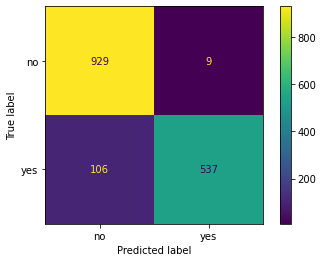

tp=537, fn=106, fp=9, tn=929
sensitivity=0.8351, specificity=0.9904
FPR=0.9595%, FNR=16.4852%


In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_knn).ravel()
plot_confusion_matrix(knn, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### Naive Bayes

In [63]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prediction_gnb = gnb.predict(X_test)
gnb_score = gnb.score(X_test, y_test)
print(f'Score={gnb_score}')

Score=0.9728020240354206


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


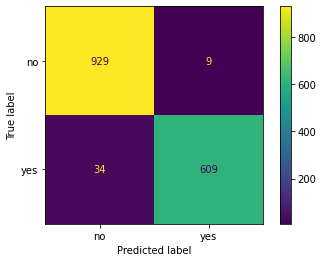

tp=609, fn=34, fp=9, tn=929
sensitivity=0.9471, specificity=0.9904
FPR=0.9595%, FNR=5.2877%


In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_gnb).ravel()
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### MLP

In [65]:
mlp = MLPClassifier(random_state=1, max_iter=300, solver='adam')
mlp.fit(X_train_standarized, y_train)
y_prediction_mlp = mlp.predict(X_test_standarized)
mlp_score = mlp.score(X_test_standarized, y_test)
print(f'Score={mlp_score}')

Score=0.9835547122074636


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


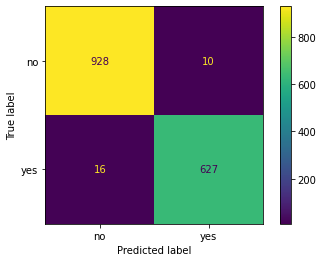

tp=627, fn=16, fp=10, tn=928
sensitivity=0.9751, specificity=0.9893
FPR=1.0661%, FNR=2.4883%


In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp).ravel()
plot_confusion_matrix(mlp, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp = tp/(tp+fn)
specificity_mlp = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity_mlp, specificity_mlp))

fpr_mlp = (1-specificity_mlp)*100
fnr_mlp = (1-sensitivity_mlp)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp, fnr_mlp))

### Decision tree

In [67]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train_standarized, y_train)
y_prediction_decision_tree = decisionTree.predict(X_test_standarized)
decision_tree_score = decisionTree.score(X_test_standarized, y_test)
print(f'Score={decision_tree_score}')

Score=0.9759645793801391


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


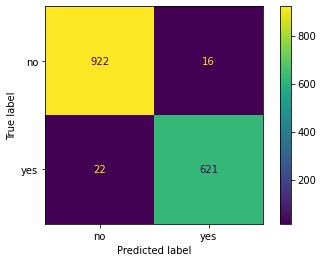

tp=621, fn=22, fp=16, tn=922
sensitivity=0.9658, specificity=0.9829
FPR=1.7058%, FNR=3.4215%


In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_decision_tree).ravel()
plot_confusion_matrix(decisionTree, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### Random Forest

In [69]:
rfc = RandomForestClassifier(max_depth=8, random_state=0)
rfc.fit(X_train_standarized, y_train)
y_prediction_rfc = rfc.predict(X_test_standarized)
rfc_score = rfc.score(X_test_standarized, y_test)
print(f'Score={rfc_score}')

Score=0.9639468690702088


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


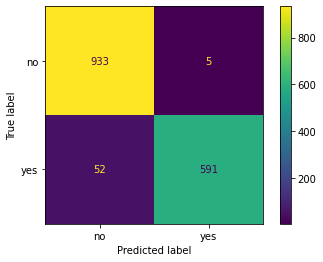

tp=591, fn=52, fp=5, tn=933
sensitivity=0.9191, specificity=0.9947
FPR=0.5330%, FNR=8.0871%


In [70]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_rfc).ravel()
plot_confusion_matrix(rfc, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### Logistic Regression

In [71]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_standarized, y_train)
y_prediction_lr = lr.predict(X_test_standarized)
lr_score = lr.score(X_test_standarized, y_test)
print(f'Score={lr_score}')

Score=0.9765970904490828


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


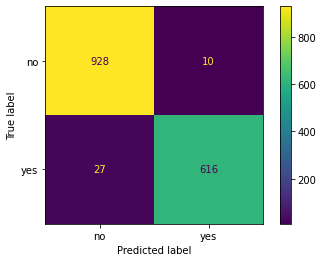

tp=616, fn=27, fp=10, tn=928
sensitivity=0.9580, specificity=0.9893
FPR=1.0661%, FNR=4.1991%


In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_lr).ravel()
plot_confusion_matrix(lr, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

# 2. Classifier parameters

### 2.1 MLP

By default MLP has solver 'adam'. 
The solver for weight optimization.
* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.
(source: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [73]:
# solver lbfgs
mlp_solver_lbfgs = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs')
mlp_solver_lbfgs.fit(X_train_standarized, y_train)
y_prediction_mlp_solver_lbfgs = mlp_solver_lbfgs.predict(X_test_standarized)
mlp_solver_lbfgs_score = mlp_solver_lbfgs.score(X_test_standarized, y_test)
print(f'Score with lbfgs solver={mlp_solver_lbfgs_score}, score with default adam solver={mlp_score}')

tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_solver_lbfgs).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp_lbfgs_solver = tp/(tp+fn)
specificity_mlp_lbfgs_solver = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity_mlp_lbfgs_solver, specificity_mlp_lbfgs_solver))

fpr_mlp_lbfgs_solver = (1-specificity_mlp_lbfgs_solver)*100
fnr_mlp_lbfgs_solver  = (1-sensitivity_mlp_lbfgs_solver)*100
print("Default adam solver: FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp, fnr_mlp))
print("lbfgs solver: FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp_lbfgs_solver, fnr_mlp_lbfgs_solver))


Score with lbfgs solver=0.9765970904490828, score with default adam solver=0.9835547122074636
tp=620, fn=23, fp=14, tn=924
sensitivity=0.9642, specificity=0.9851
Default adam solver: FPR=1.0661%, FNR=2.4883%
lbfgs solver: FPR=1.4925%, FNR=3.5770%


In [74]:
# solver sgd
mlp_solver_lbfgs = MLPClassifier(random_state=1, max_iter=300, solver='sgd')
mlp_solver_lbfgs.fit(X_train_standarized, y_train)
y_prediction_mlp_solver_lbfgs = mlp_solver_lbfgs.predict(X_test_standarized)
mlp_solver_lbfgs_score = mlp_solver_lbfgs.score(X_test_standarized, y_test)
print(f'Score with sgd solver={mlp_solver_lbfgs_score}, score with default adam solver={mlp_score}')

tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_solver_lbfgs).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp_lbfgs_solver = tp/(tp+fn)
specificity_mlp_lbfgs_solver = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity_mlp_lbfgs_solver, specificity_mlp_lbfgs_solver))

fpr_mlp_lbfgs_solver = (1-specificity_mlp_lbfgs_solver)*100
fnr_mlp_lbfgs_solver  = (1-sensitivity_mlp_lbfgs_solver)*100
print("Default adam solver: FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp, fnr_mlp))
print("sgd solver: FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp_lbfgs_solver, fnr_mlp_lbfgs_solver))

Score with sgd solver=0.978494623655914, score with default adam solver=0.9835547122074636
tp=617, fn=26, fp=8, tn=930
sensitivity=0.9596, specificity=0.9915
Default adam solver: FPR=1.0661%, FNR=2.4883%
sgd solver: FPR=0.8529%, FNR=4.0435%


Observation: solver sgd gives better FPR and worse FNR, so we will continue tests with this one.

### Hidden layers and number of neurons
By default there is 1 hidden layer with 100 neurons. In hidden_layer_neuron_numbers there are number of neurons in hidden layer.

In [75]:
# 1 hidden layer
hidden_layer_neuron_numbers = [8, 16, 32, 40, 50, 64, 100, 128, 256]
for i in range(len(hidden_layer_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layer_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layer_neuron_numbers[i]), solver='sgd')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)


********************
Number of neurons in hidden layer = 8
Score=0.9778621125869703, score with default=0.9835547122074636 (-0.005692599620493288)
tp=616, fn=27, fp=8, tn=930
sensitivity=0.9580093312597201 (-0.01710730948678063), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=4.1991% (+1.7107%)
                    
********************
Number of neurons in hidden layer = 16
Score=0.9797596457938014, score with default=0.9835547122074636 (-0.003795066413662229)
tp=618, fn=25, fp=7, tn=931
sensitivity=0.9611197511664075 (-0.013996889580093264), specificity=0.9925373134328358 (+0.0031982942430703876)
FPR=0.7463% (-0.3198%), FNR=3.8880% (+1.3997%)
                    
********************
Number of neurons in hidden layer = 32
Score=0.9772296015180265, score with default=0.9835547122074636 (-0.006325110689437086)
tp=615, fn=28, fp=8, tn=930
sensitivity=0.9564541213063764 (-0.018662519440124314), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=

Learning_rate schedule for weight updates. (By default 'constant', only used when solver is 'sgd')
* ‘constant’ is a constant learning rate given by ‘learning_rate_init’.

* ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

* ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.


In [76]:
# learning_rate='invscaling'
for i in range(len(hidden_layer_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layer_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layer_neuron_numbers[i]), solver='sgd', learning_rate='invscaling')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)

********************
Number of neurons in hidden layer = 8
Score=0.7330803289057558, score with default=0.9835547122074636 (-0.2504743833017078)
tp=242, fn=401, fp=21, tn=917
sensitivity=0.37636080870917576 (-0.598755832037325), specificity=0.9776119402985075 (-0.011727078891257903)
FPR=2.2388% (+1.1727%), FNR=62.3639% (+59.8756%)
                    
********************
Number of neurons in hidden layer = 16
Score=0.5850727387729285, score with default=0.9835547122074636 (-0.39848197343453506)
tp=448, fn=195, fp=461, tn=477
sensitivity=0.6967340590979783 (-0.2783825816485225), specificity=0.5085287846481876 (-0.4808102345415778)
FPR=49.1471% (+48.0810%), FNR=30.3266% (+27.8383%)
                    
********************
Number of neurons in hidden layer = 32
Score=0.7906388361796332, score with default=0.9835547122074636 (-0.19291587602783045)
tp=333, fn=310, fp=21, tn=917
sensitivity=0.5178849144634525 (-0.4572317262830482), specificity=0.9776119402985075 (-0.011727078891257903)
FPR

In [77]:
# learning_rate='adaptive'
for i in range(len(hidden_layer_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layer_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layer_neuron_numbers[i]), solver='sgd', learning_rate='adaptive')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)

********************
Number of neurons in hidden layer = 8
Score=0.9778621125869703, score with default=0.9835547122074636 (-0.005692599620493288)
tp=616, fn=27, fp=8, tn=930
sensitivity=0.9580093312597201 (-0.01710730948678063), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=4.1991% (+1.7107%)
                    
********************
Number of neurons in hidden layer = 16
Score=0.9797596457938014, score with default=0.9835547122074636 (-0.003795066413662229)
tp=618, fn=25, fp=7, tn=931
sensitivity=0.9611197511664075 (-0.013996889580093264), specificity=0.9925373134328358 (+0.0031982942430703876)
FPR=0.7463% (-0.3198%), FNR=3.8880% (+1.3997%)
                    
********************
Number of neurons in hidden layer = 32
Score=0.9765970904490828, score with default=0.9835547122074636 (-0.006957621758380772)
tp=615, fn=28, fp=9, tn=929
sensitivity=0.9564541213063764 (-0.018662519440124314), specificity=0.990405117270789 (+0.0010660980810235365)
FPR=

2 layers in hidden layer with sgd solver

In [78]:
# hidden layers
# learning_rate = 'adaptive'
hidden_layers_neuron_numbers = [(16, 16), (16, 32), (100, 128), (128, 256)]
for i in range(len(hidden_layers_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layers_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layers_neuron_numbers[i]), solver='sgd', learning_rate='adaptive')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)

********************
Number of neurons in hidden layer = (16, 16)
Score=0.9797596457938014, score with default=0.9835547122074636 (-0.003795066413662229)
tp=619, fn=24, fp=8, tn=930
sensitivity=0.9626749611197511 (-0.01244167962674958), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=3.7325% (+1.2442%)
                    
********************
Number of neurons in hidden layer = (16, 32)
Score=0.9772296015180265, score with default=0.9835547122074636 (-0.006325110689437086)
tp=615, fn=28, fp=8, tn=930
sensitivity=0.9564541213063764 (-0.018662519440124314), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=4.3546% (+1.8663%)
                    
********************
Number of neurons in hidden layer = (100, 128)
Score=0.978494623655914, score with default=0.9835547122074636 (-0.005060088551549602)
tp=619, fn=24, fp=10, tn=928
sensitivity=0.9626749611197511 (-0.01244167962674958), specificity=0.9893390191897654 (+0.0)
FP

### 2.2 Decision tree

# 3. Feature selection

### 3.1 RFE - Recursive feature elimination
Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [80]:
# data size
print(dataFrame.shape)

(4789, 463)


In [177]:
# take 200 most informative features
n_features = 200
mlp_n16= MLPClassifier(random_state=1, max_iter=300)
mlp_n16.fit(X_train, y_train)
rfe = RFE(estimator=mlp_n16, n_features_to_select=n_features, step=10)
rfe.fit(X_train, y_train)

# X_train_rfe = rfe.fit_transform(X_train, y_train)

# X_test_rfe = rfe.transform(X_test)
# print(f'X_train_rfe={X_train_rfe.shape}')
# rfe.fit(X_train_rfe, y_train)
# newScore = rfe.score(X_test_standarized, y_test)
# newPrediction = rfe.predict(X_test_rfe)

# print(f'Score={newScore}')

# tn, fp, fn, tp = confusion_matrix(y_test, newPrediction).ravel()
# print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
# sensitivity_mlp_n16 = tp/(tp+fn)
# specificity_mlp_n16 = tn/(fp+tn)
# print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity_mlp_n16, specificity_mlp_n16))

# fpr_mlp_n16 = (1-specificity_mlp_n16)*100
# fnr_mlp_n16 = (1-sensitivity_mlp_n16)*100
# print("FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp_n16, fnr_mlp_n16))


RFE(estimator=MLPClassifier(max_iter=300, random_state=1),
    n_features_to_select=200, step=10)

### 3.2 Univariate feature selection - SelectKBest

In [242]:
# split data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=331, test_size=0.33)
print(f'Train shape: {X_train.shape}, test shape: {X_test.shape}')

# standarize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# select 70 best features
bestFeatures = 70
skb = SelectKBest(chi2, k=bestFeatures)
X_train_std_skb = skb.fit_transform(X_train_std, y)
print(X_train_std_skb)

# mlpWithSelectKBest = MLPClassifier(random_state=1, max_iter=400)
# mlpWithSelectKBest.fit(X_train_std, y_train)
# print(f'mean = {X_train_std.mean(axis=0)}')
# y_prediction_mlpWithSelectKBest = mlpWithSelectKBest.predict(X_test)
# mlpWithSelectKBest_score = mlpWithSelectKBest.score(X_test, y_test)
# print(f'Score={mlpWithSelectKBest_score}')

# # confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlpWithSelectKBest).ravel()
# print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
# sensitivity_mlpWithSelectKBest = tp/(tp+fn)
# specificity_mlpWithSelectKBest = tn/(fp+tn)
# print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity_mlpWithSelectKBest, specificity_mlpWithSelectKBest))

# # fpr and fnr
# fpr_mlpWithSelectKBest = (1-specificity_mlpWithSelectKBest)*100
# fnr_mlpWithSelectKBest = (1-sensitivity_mlpWithSelectKBest)*100
# print("FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlpWithSelectKBest, fnr_mlpWithSelectKBest))

SyntaxError: invalid syntax (Temp/ipykernel_6252/740350696.py, line 2)

### 3.3 PCA

In [240]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=331, test_size=0.33)
print(f'Train shape: {X_train.shape}, test shape: {X_test.shape}')

# standarize
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# pca
components = 60
pca = PCA(n_components=components)
X_train_pca = pca.fit_transform(X_train_std)
print(X_train_pca.shape)

# mlp
mlp_pca = MLPClassifier(random_state=1, max_iter=400, solver='sgd')
mlp_pca.fit(X_train_pca, y_train)
X_test_std = pca.transform(X_test_std)
y_prediction_mlp_pca = mlp_pca.predict(X_test_std)
mlp_pca_score = mlp_pca.score(X_test_std, y_test)
print(f'Score={mlp_pca_score}')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_pca).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp_pca = tp/(tp+fn)
specificity_mlp_pca = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity_mlp_pca, specificity_mlp_pca))

# fpr and fnr
fpr_mlp_pca = (1-specificity_mlp_pca)*100
fnr_mlp_pca = (1-sensitivity_mlp_pca)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr_mlp_pca, fnr_mlp_pca))

Train shape: (3208, 462), test shape: (1581, 462)
(3208, 60)
Score=0.9759645793801391
tp=611, fn=32, fp=6, tn=932
sensitivity=0.9502, specificity=0.9936
FPR=0.6397%, FNR=4.9767%
